In [23]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np


#Load dataset
#split into input (X) and output (y)
X = np.linspace(0,100,60)
"""
create a data array with 60 values. This number was chosen due to the Professor's suggestion in class to
"keep a significant amount of data for testing, for example 40%"
"""
X = X.reshape(-1, 1) # turn it into a column array like in the original code
X = X*1.0

y = np.power(X, 1/7) #calculate the seventh root for each element in the array
y = y*1.0

#define keras model
model = Sequential()
"""
increased the number of neurons per layer in a structure recommender by ChatGPT (8,16,8)
ChatGPT claimed that this structure was more flexible
"""
model.add(Dense(8,input_dim=1,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)



#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 10 cases
for i in range(10):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 8)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 917 (3.59 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 612 (2.39 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[0.0] => 0.17 (expected 0.00)
[1.694915254237288] => 0.85 (expected 1.08)
[3.389830508474576] => 1.23 (expected 1.19)
[5.084745762711864] => 1.27 (expected 1.26)
[6.779661016949152] => 1.30 (expected 1.31)
[8.47457627118644] => 1.32 (expected 1.36)
[10.169491525423728] => 1.35 (expected 1.39)
[11.864406779661017] => 1.37 (expected 1.42)
[13.559322033898304] => 1.40 (expected 1.45)
[15.254237288135592] => 1.42 (expected 1.48)


<ipython-input-23-7fcd556da0b9>:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


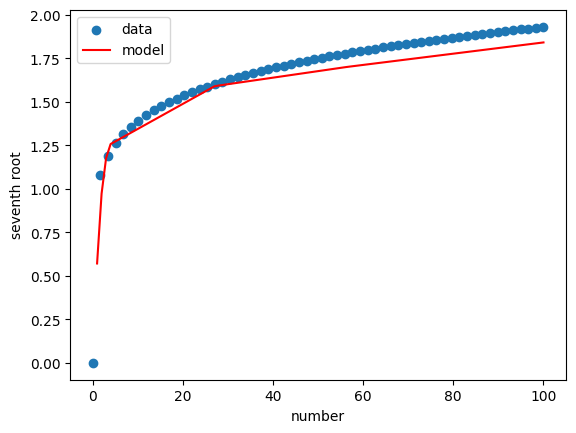

In [25]:
import matplotlib.pyplot as plt
number_grid = np.linspace(1, 100, 100)
plt.scatter(X,y, label='data')
plt.plot(number_grid,model.predict(np.expand_dims(number_grid,axis=1)) , color='red', label='model')
plt.xlabel('number')
plt.ylabel('seventh root')
plt.legend()